In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
#iris = load_breast_cancer()
#print(iris.DESCR)
X, t = load_breast_cancer(return_X_y=True)
#print(X)
print(X.shape)
#print(t)
print(t.shape)

(569, 30)
(569,)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 1/5, random_state = 2455)

print(X_train)
print("X_train shape:",X_train.shape)
#print(X_test)
print("X_test shape:",X_test.shape)

#print(t_train)
print("t_train shape:",t_train.shape)
#print(t_test)
print("t_test shape:",t_test.shape)

[[1.910e+01 2.629e+01 1.291e+02 ... 1.841e-01 2.311e-01 9.203e-02]
 [1.283e+01 1.573e+01 8.289e+01 ... 9.783e-02 3.006e-01 7.802e-02]
 [1.940e+01 1.818e+01 1.272e+02 ... 2.252e-01 3.590e-01 7.787e-02]
 ...
 [1.234e+01 2.686e+01 8.115e+01 ... 1.459e-01 3.215e-01 1.205e-01]
 [1.953e+01 1.890e+01 1.295e+02 ... 1.980e-01 2.968e-01 9.929e-02]
 [1.189e+01 1.736e+01 7.620e+01 ... 8.946e-02 2.220e-01 6.033e-02]]
X_train shape: (455, 30)
X_test shape: (114, 30)
t_train shape: (455,)
t_test shape: (114,)


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#print(X_train)
print("X_train shape:",X_train.shape)
#print(X_test)
print("X_test shape:",X_test.shape)


X_train shape: (455, 30)
X_test shape: (114, 30)


[[  0   2   7   8  12  14  15  19  26  36  37  38  40  43  48  52  53  54
   57  58  60  61  63  64  67  79  84  85  86  90  94  96  98  99 101 102
  107 110 112 114 122 129 132 133 136 137 138 141 144 147 148 149 150 151
  155 157 161 163 164 165 167 170 173 181 182 184 185 187 188 189 191 193
  195 197 199 203 205 210 212 215 218 219 225 227 228 234 235 236 239 243
  248 249 250 254 258 262 265 268 270 271 275 276 277 281 282 284 287 289
  292 296 299 300 301 305 306 320 321 322 330 331 332 337 338 341 343 345
  346 349 350 352 354 357 359 365 367 369 371 373 375 376 377 378 381 382
  383 389 390 392 399 401 402 406 407 409 412 415 416 417 419 420 423 425
  426 427 429 431 433 434 436 437 438 441 442 447 448 451 452 453]]
[[  1   3   4   5   6   9  10  11  13  16  17  18  20  21  22  23  24  25
   27  28  29  30  31  32  33  34  35  39  41  42  44  45  46  47  49  50
   51  55  56  59  62  65  66  68  69  70  71  72  73  74  75  76  77  78
   80  81  82  83  87  88  89  91  92  93  9

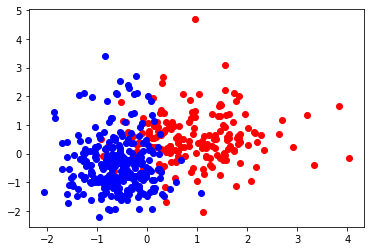

In [5]:
#splitting the dataset to Class 1 and 0 for training set
#print(t_train)

class_0 = np.asarray(np.nonzero(t_train == 0))
print(class_0)

class_1 = np.asarray(np.nonzero(t_train == 1))
print(class_1)

[m_0, n_0] = class_0.shape
[m_1, n_1] = class_1.shape

X_train_0 = np.zeros((n_0,30))
X_train_1 = np.zeros((n_1,30))
t_train_0 = np.zeros(n_0)
t_train_1 = np.ones(n_1)

#print(X_train[1,:])

for i in range(n_0):
    X_train_0[i,:] = X_train[class_0[0,i],:] 
#print(X_train_0)
for i in range(n_1):
    X_train_1[i,:] = X_train[class_1[0,i],:]
#print(X_train_1)

X_train_binary = np.concatenate((X_train_0, X_train_1), axis = 0)
t_train_binary = np.concatenate((t_train_0, t_train_1), axis = 0)
#print(t_train_binary)

plt.scatter(X_train_0[:,0], X_train_0[:,1], color = 'red')
plt.scatter(X_train_1[:,0], X_train_1[:,1], color = 'blue')

(114, 30)
(455, 30)


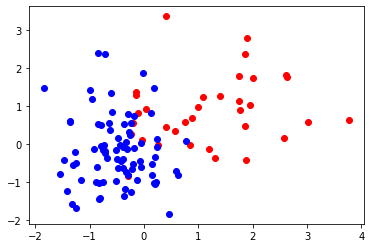

In [25]:
#splitting the dataset to Class 1 and 0 for validation set
#print(t_test)

class_0 = np.asarray(np.nonzero(t_test == 0))
#print(class_0)

class_1 = np.asarray(np.nonzero(t_test == 1))
#print(class_1)

[m_0, n_0] = class_0.shape
[m_1, n_1] = class_1.shape

X_test_0 = np.zeros((n_0,30))
X_test_1 = np.zeros((n_1,30))
t_test_0 = np.zeros(n_0)
t_test_1 = np.ones(n_1)

#print(X_test[1,:])

for i in range(n_0):
    X_test_0[i,:] = X_test[class_0[0,i],:] 
#print(X_train_0)
for i in range(n_1):
    X_test_1[i,:] = X_test[class_1[0,i],:]
#print(X_train_1)

X_test_binary = np.concatenate((X_test_0, X_test_1), axis = 0)
t_test_binary = np.concatenate((t_test_0, t_test_1), axis = 0)
print(X_test_binary.shape)
print(X_train_binary.shape)

plt.scatter(X_test_0[:,0], X_test_0[:,1], color = 'red')
plt.scatter(X_test_1[:,0], X_test_1[:,1], color = 'blue')

*******************sklearn Logistic Regression***************************


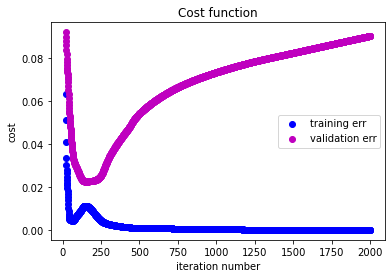

[   0.          -57.9167815   -48.86703292    9.22900764 -179.07043543
 -103.94156769  -61.08712167  -69.83129713  -61.99901602  -29.54925074
  -88.00337869 -160.92741201 -118.4163011  -207.45308482 -119.05103761
  -38.72657834  -92.52098753  -90.05195933 -175.73770118   -9.48364887
  -31.894033     31.81927933  -67.15365417  -77.92299347 -148.64936722
  -76.36386401 -109.15280104  -23.7107735   -86.85073273  -31.02639971
 -138.24479653  -12.87542304  -83.97544999 -104.30510771  -37.80407178
   51.94153738   33.0059784    37.67894639   73.60640826   41.96968049
   19.729768      6.2578812    30.73732414   13.17985317    1.7514715
   13.63392728    6.12035339   12.32254562   37.46250764   33.06161479
   43.52762545  -21.3408801    36.00622421   64.01709494   94.81162376
    8.27291365   10.88358551   43.53998281   39.84126183   35.2354373
   26.24715975   35.92822971   30.54346115   14.2977154    14.17428274
   23.29679493   47.88461356   52.76449161   41.44512232   37.24327327
   13.26

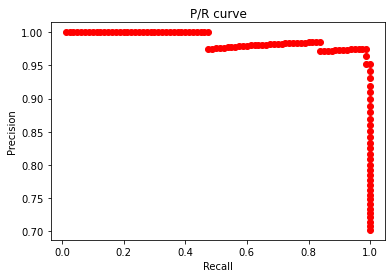

Missclassification rate: 0.043859649122807015
Recall: 0.9625
Precision: 0.9746835443037974
F1 score: 0.9685534591194969
*******************sklearn Logistic Regression***************************
Missclassification rate: 0.02631578947368421
Recall: 0.9875
Precision: 0.9753086419753086
F1 score: 0.9813664596273292
115
[0.04385965 0.10526316 0.09649123 0.13157895 0.28947368 0.21052632
 0.11403509 0.14035088 0.12280702 0.05263158 0.18421053 0.27192982
 0.23684211 0.29824561 0.24561404 0.0877193  0.20175439 0.19298246
 0.28070175 0.03508772 0.07017544 0.37719298 0.13157895 0.15789474
 0.26315789 0.14912281 0.22807018 0.04385965 0.1754386  0.06140351
 0.25438596 0.04385965 0.16666667 0.21929825 0.07894737 0.62280702
 0.36842105 0.49122807 0.68421053 0.56140351 0.22807018 0.09649123
 0.36842105 0.14912281 0.05263158 0.16666667 0.0877193  0.14035088
 0.47368421 0.37719298 0.57894737 0.03508772 0.42982456 0.6754386
 0.69298246 0.12280702 0.13157895 0.5877193  0.51754386 0.4122807
 0.29824561 0.4

In [26]:
misclass, r, p, F1 = manual_gradient(X_train_binary, X_test_binary, t_train_binary, t_test_binary) # self-made logistic regression function

from sklearn.linear_model import LogisticRegression
misclass_sk, r_sk, p_sk, F1_sk = sklearn_logistic(X_train, X_test, t_train, t_test) # sklearn logistic regression function

better_misclass = 0
better_F1 = 0
misclass_len = len(misclass)

print(misclass_len)
print(misclass)
print(F1)

# comparing the metrics found in manual logistic regression to the ones found in sklearn logistic regression
for i in range(0, misclass_len, 1):
    if(misclass[i] < misclass_sk):
        better_misclass += 1
    if(F1[i] > F1_sk):
        better_F1 += 1
        
print("Is manual better? Mislassification:",better_misclass)
print("Is manual better? F1 score:", better_F1)

In [31]:
manual_nearest(X_train, X_test, t_train, t_test) # self-made k-nearest neighhors function

from sklearn.model_selection import KFold 
sklearn_KFold(X_train, X_test, t_train, t_test) # sklearn k-nearest neighbor function

*******************Manual KFold Validation***************************
k = 1
k = 2
k = 3
k = 4
k = 5
Cross Missclassification: [0.05274725 0.04615385 0.03516484 0.04175824 0.03956044]
best hyperparameter is k = 3
Test missclassification 0.03508771929824561
*******************sklearn KFold Validation***************************
k = 1
k = 2
k = 3
k = 4
k = 5
Cross Missclassification: [0.05274725 0.04615385 0.03516484 0.04175824 0.03956044]
best hyperparameter is k = 3
Test missclassification 0.03508771929824561


In [30]:
###### function to manually find the missclassification rate with KFold  
###### validation of a nearest neighbor classifier
# *********************************Parameters***********************************
# X_train: training set
# X_valid: validation set
# t_train: training set targets
# t_valid: validation set targets

def manual_nearest(X_train, X_valid, t_train, t_valid):
    print("*******************Manual KFold Validation***************************")
    
    [N_row, N_col] = X_train.shape # dimension of the training set
    [M_row, M_col] = X_valid.shape # dimension of the validation/test set
    
    #*******Debugging print statementes**********
    #print(N_row, M_row)

    # KFold validation parameters
    K = 5 # number of subset from the training set
    split_interval = round(N_row/K) # number for split of the training set
    lower_bound = 0 # variable used as the lower bound for the split
    upper_bound = split_interval # variable used as the upper bound for the split
    
    #*******Debugging print statementes**********
    #print(distance.shape)
    #print(t_train[91:182])
    #print(t_train.shape)
    #print(t_valid)
    #print(t_valid.shape)
    
    missclass = np.zeros(K) # array to hold the missclassification rates for the cross validation
    
    for k in range(1,6,1): # to iterate through the hyper paramter options
        print("k =",k) 
        for i in range(0, K, 1): # iterate through the subsets
            #*******Debugging print statementes**********
            #print("Lower bound:",lower_bound,"Upper bound:",upper_bound)

            KFold_X_val = X_train[lower_bound:upper_bound] # splitting the validation set from the training set
            KFold_t_val = t_train[lower_bound:upper_bound] # splitting the validation set targets
            #*******Debugging print statementes**********
            #print("Validation set:", KFold_val[:5,:5])
            #print("Validation set size:", KFold_val.shape)
            
            # splitting the training set for when the validation set is between 0 to split_interval
            if(lower_bound == 0): 
                KFold_X_train = X_train[upper_bound:N_row]
                KFold_t_train = t_train[upper_bound:N_row] 
            # splitting the training set for when the validation set is between split_interval to max length
            elif(upper_bound == N_row):
                KFold_X_train = X_train[0:lower_bound]
                KFold_t_train = t_train[0:lower_bound]
            # splitting the training set for when the validation set is between lower and upper bound
            else:
                KFold_X_train = np.concatenate((X_train[0:lower_bound], X_train[upper_bound:N_row]), axis=0)
                KFold_t_train = np.concatenate((t_train[0:lower_bound], t_train[upper_bound:N_row]), axis=0)

            #*******Debugging print statementes**********    
            #print("Training set:", KFold_X_train[:5, :5])
            #print("Training set size:", KFold_X_train.shape)
            #print("Training set:", KFold_t_val)
            #print("Training set size:", KFold_t_train.shape)

            M = len(KFold_X_val) # length of the new training sets
            N = len(KFold_X_train) # length of the target training sets

            #print(M, N)

            distance = np.zeros((M,N)) # array to hold the calculated distances

            # nested for-loop to find the distance between the validation set and training set
            for i in range(M):
                for j in range(N):
                    diff = KFold_X_val[i]-KFold_X_train[j]
                    distance[i,j] = np.dot(diff,diff)

            index = np.argsort(distance, axis = 1) # finding the shorest distance from calculated values

            #*******Debugging print statementes**********
            #print(index[:,:2])
            #print(index[:,0].shape)

            predicted = np.zeros(M) # array to store the target values for the corresponding shortest values

            j = 0
            True_pos = 0 # variable to hold the value for the True positive count
            False_pos = 0 # variable to hold the value for the False positive count
            True_neg = 0 # variable to hold the value for the True negative count
            False_neg = 0 # varible to hold the value fro the False negative count

            # when the hyperparameter k = 1
            if(k == 1):
                for i in index[:,0]:
                    predicted[j] = KFold_t_train[i]
                    # to see if the predicted value is a True positive
                    if(predicted[j] == 1 and KFold_t_val[j] == 1):
                        True_pos += 1
                    # to see if the predicted value is a False positive
                    elif(predicted[j] == 0 and KFold_t_val[j] == 0):
                        True_neg += 1
                    # to see if the predicted value is a True negative
                    elif(predicted[j] > KFold_t_val[j]):
                        False_pos += 1
                    # to see if the predicted value is a False negative
                    elif(predicted[j] < KFold_t_val[j]):
                        False_neg += 1
                    j += 1
            # when the hyperparameter is k > 1
            elif(k > 1):
                for i in index[:,:k]:
                    temp = 0
                    # goes through the k smallest values
                    for t in range(0, k, 1):
                        temp += KFold_t_train[i[t]]
                        predicted[j] = int(np.round(temp/k))
                    # to see if the predicted value is a True positive
                    if(predicted[j] == 1 and KFold_t_val[j] == 1):
                        True_pos += 1
                    # to see if the predicted value is a False positive
                    elif(predicted[j] == 0 and KFold_t_val[j] == 0):
                            True_neg += 1
                    # to see if the predicted value is a True negative
                    elif(predicted[j] > KFold_t_val[j]):
                        False_pos += 1
                    # to see if the predicted value is a False negative
                    elif(predicted[j] < KFold_t_val[j]):
                        False_neg += 1
                    j += 1

            #*******Debugging print statementes**********
            #print(predicted)
            #print("True positive:",True_pos)
            #print("True negative:",True_neg)
            #print("False positive:",False_pos)
            #print("False negative:",False_neg)   
            #print("Misscalculation:", (False_neg+False_pos)/(True_pos+False_pos+True_neg+False_neg))
            
            missclass[k-1] += (False_neg+False_pos)/(True_pos+False_pos+True_neg+False_neg) # missclassification rate for current training and validation set 
            lower_bound += split_interval # iterate the lower bound by the split interval
            upper_bound += split_interval # iterate the upper bound by the split interval
            
        lower_bound = 0 # reset the lower bound for next hyperparameter
        upper_bound = split_interval # reset the upper bound for the next hyperparameter
    
    missclass = missclass/5 # average missclassification for each hyperparameter
    best_k = np.argmin(missclass)+1 # best hyperparameter
    
    #*******Debugging print statementes**********
    print("Cross Missclassification:", missclass) 
    print("best hyperparameter is k =", best_k)
    
    distance = np.zeros((M_row, N_row)) # reset the distance array
    
    # finding the shortest distance between the actual test set and training set
    for i in range(M_row):
        for j in range(N_row):
            diff = X_valid[i] - X_train[j]
            distance[i,j] = np.dot(diff,diff)
    
    j = 0
    True_pos = 0 # variable to hold the value for the True positive count
    False_pos = 0 # variable to hold the value for the False positive count
    True_neg = 0 # variable to hold the value for the True negative count
    False_neg = 0 # varible to hold the value fro the False negative count
    
    test_miss = 0 # variable to hold the missclassification rate between test set and validation set
    predicted = np.zeros(M_row)
    
    index = np.argsort(distance, axis = 1) # find the shortest distance for the distance calculated
    
    # finding the missclassification rate
    for i in index[:,:best_k]:
        temp = 0
        for t in range(0, best_k, 1):
            temp += t_train[i[t]]
            predicted[j] = int(np.round(temp/best_k))
        if(predicted[j] == 1 and t_valid[j] == 1):
            True_pos += 1
        elif(predicted[j] == 0 and t_valid[j] == 0):
                True_neg += 1
        elif(predicted[j] > t_valid[j]):
            False_pos += 1
        elif(predicted[j] < t_valid[j]):
            False_neg += 1
        j += 1
        
    #*******Debugging print statementes**********
    #print(j)
    #print(predicted)
    #print(t_valid)
    #print("True positive:",True_pos)
    #print("True negative:",True_neg)
    #print("False positive:",False_pos)
    #print("False negative:",False_neg) 
    
    test_miss = (False_neg+False_pos)/(True_pos+False_pos+True_neg+False_neg) 
    
    #*******Debugging print statementes**********
    print("Test missclassification", test_miss)

In [17]:
###### function to manually find the missclassification rate, Recall value, 
###### Precision, and F1 score with logistic regression
# *********************************Parameters***********************************
# X_train: training set
# X_valid: validation set
# t_train: training set targets
# t_valid: validation set targets

def manual_gradient(X_train, X_test, t_train, t_test):
    print("*******************sklearn Logistic Regression***************************")
    
    [N_row, N_col] = X_train.shape
    [M_row, M_col] = X_test.shape
    
    new_col = np.ones(N_row)
    X_feature_train = np.insert(X_train, 0, new_col, axis = 1)
    new_col = np.ones(M_row)
    X_feature_test = np.insert(X_test, 0, new_col, axis = 1)
    
    #*******Debugging print statementes**********    
    #print(X_feature_train)
    #print(X_feature_train.shape)
    
    alpha = 0.5
    w = np.array(np.zeros(N_col+1))
    for i in range(0, N_col, 1):
        w[i] = N_col - i
        
    #*******Debugging print statementes**********    
    #print(w)
    #print(w.shape)
    
    z_train = np.zeros(N_row)
    z_val = np.zeros(M_col)
    
    y = np.zeros(N_col)
    y = np.zeros(M_col)
    
    IT = 2000
    
    cost_train = np.zeros(IT)
    cost_val = np.zeros(IT)
    
    
    gradient = np.zeros(IT)
    
    #*******Debugging print statementes**********    
    #print(t_train)
    #print(t_test)
    
    for n in range(IT):
        z_train = np.dot(X_feature_train, w)
        z_val = np.dot(X_feature_test, w)
        
        #*******Debugging print statementes**********    
        #print(z_train.shape)
        
        y = 1/(1+np.exp(-z_train))
        diff = y - t_train
        
        #print(y)
        
        gr = np.dot(X_feature_train.T, diff)/N_col
        
        w = w - (alpha*gr)
        
        for i in range(N_col):
            cost_train[n] += (t_train[i] * np.logaddexp(0,-z_train[i])) + ((1-t_train[i]) * np.logaddexp(0, z_train[i]))
            
        for i in range(M_col):
            cost_val[n] += (t_test[i] * np.logaddexp(0,-z_val[i])) + ((1-t_test[i]) * np.logaddexp(0, z_val[i]))
        
        cost_train[n] /= N_row
        cost_val[n] /= N_row
        
    #print(w)

    
    #plotting the learning curve
    init = 20
    lin = np.linspace(init+1,IT,IT-init)
    plt.scatter(lin, cost_train[init:], color = 'blue', label='training err')
    plt.scatter(lin, cost_val[init:], color = 'm', label = 'validation err')
    plt.title('Cost function')
    plt.legend()
    plt.ylabel('cost')
    plt.xlabel('iteration number')
    #plt.scatter(lin, gr_norms, color = 'red')
    plt.show()
    
    y_valid = np.zeros(M_row)
    ones = np.array(np.zeros(1))

    z_val = np.concatenate((ones, z_val), axis = 0)
    print(z_val)
    
    True_pos = 0
    False_pos = 0
    True_neg = 0
    False_neg = 0
    
    j = 0
    p = np.array(np.zeros(M_row+1))
    r = np.array(np.zeros(M_row+1))
    err = np.array(np.zeros(M_row+1))
    F1 = np.array(np.zeros(M_row+1))
    
    for theta in z_val:
        for i in range(M_row):
            if(z_val[i+1] >= theta):
                y_valid[i] = 1
            else:
                y_valid[i] = 0
                
            if(y_valid[i] == 1 and t_test[i] == 1):
                True_pos += 1
            elif(y_valid[i] == 0 and t_test[i] == 0):
                True_neg += 1
            elif(y_valid[i] > t_test[i]):
                False_pos += 1
            elif(y_valid[i] < t_test[i]):
                False_neg += 1
        
        #*******Debugging print statementes**********    
        #print("Theta:", theta)
        #print("True positive:",True_pos)
        #print("True negative:",True_neg)
        #print("False positive:",False_pos)
        #print("False negative:",False_neg)   
        #print("Total:", True_pos + True_neg + False_pos + False_neg)
        
        u = y_valid - t_test
   
        err[j] = np.count_nonzero(u)/M_row
        p[j] = True_pos/(True_pos + False_pos)
        r[j] = True_pos/(True_pos + False_neg)
        F1[j] = (2*p[j]*r[j])/(p[j]+r[j])
        
        #*******Debugging print statementes**********    
        #print("Missclassification rate:", err)
        #print("Recall:", r)
        #print("Precision:", p)
        
        j += 1
        True_pos = 0
        True_neg = 0
        False_pos = 0
        False_neg = 0
    
    print("Missclassification rate:", err)
    #print("Missclassification rate:", err.shape)
    
    print("Recall:", r)
    #print("Recall:", r.shape)
    
    print("Precision:", p)
    #print("Precision:", p.shape)
    
    print("F1 score:", F1)
    #print("F1 score:", F1.shape)

    #plotting the learning curve
    plt.scatter(r[1:], p[1:], color = 'red', label='training err')
    plt.title('P/R curve')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()
    
    total = len(err)
    
    print("Missclassification rate:", err[0]) # missclassification rate for class 1 z > 0 and class 0 z < 0
    print("Recall:", r[0]) # recall for class 1 z > 0 and class 0 z < 0
    print("Precision:", p[0]) # precision for class 1 z > 0 and class 0 z < 0
    print("F1 score:", F1[0]) # F1 score for class 1 z > 0 and class 0 z < 0
    
    return err, r, p, F1

In [18]:
def sklearn_logistic(X_train, X_test, t_train, t_test):
    print("*******************sklearn Logistic Regression***************************")
    
    logisticReg = LogisticRegression()
    logisticReg.fit(X_train, t_train)
    
    predictions = logisticReg.predict(X_test)
    
    N = len(predictions)
    
    #print(predictions)
    
    j = 0
    True_pos = 0
    True_neg = 0
    False_pos = 0
    False_neg = 0
    
    for i in range(0, N, 1):
        if(predictions[i] == 1 and t_test[i] == 1):
            True_pos += 1
        elif(predictions[i] == 0 and t_test[i] == 0):
            True_neg += 1
        elif(predictions[i] > t_test[i]):
            False_pos += 1
        elif(predictions[i] < t_test[i]):
            False_neg += 1
    
    missclass = (False_neg+False_pos)/(True_pos+False_pos+True_neg+False_neg) # missclassification rate for current training and validation set
    p = True_pos/(True_pos + False_pos)
    r = True_pos/(True_pos + False_neg)
    F1 = (2*p*r)/(p+r)
    
    print("Missclassification rate:", missclass)

    print("Recall:", r)
    
    print("Precision:", p)
    
    print("F1 score:", F1)

    return missclass, r, p, F1

In [19]:
def sklearn_KFold(X_train, X_valid, t_train, t_valid):
    print("*******************sklearn KFold Validation***************************")
    
    kf = KFold(n_splits = 5)
    kf.get_n_splits(X_train)
    
    missclass = np.zeros(5) # array to hold the missclassification rates for the cross validation
    
    for k in range(1, 6, 1):
        print("k =", k)
        
        # KFold implementation using sklearn
        for train_i, test_i in kf.split(X_train): 
            x_train, x_test = X_train[train_i], X_train[test_i]
            y_train, y_test = t_train[train_i], t_train[test_i]

            #*******Debugging print statementes**********
            #print("KFold Training set:", train_i)
            #print("KFold Validation set:", test_i)
            #print("KFold training set shape:", x_train)
            #print("KFold test set shape:", x_test)
            #print("KFold training set :", x_train)
            #print("KFold test set :", x_test)
            
            [N_row, N_col] = x_train.shape
            [M_row, M_col] = x_test.shape
            
            distance = np.zeros((M_row, N_row))
            
            for i in range(M_row):
                for j in range(N_row):
                    diff = x_test[i] - x_train[j]
                    distance[i,j] = np.dot(diff, diff)
            
            index = np.argsort(distance, axis = 1)
            
            #*******Debugging print statementes**********
            #print(index)
            
            predicted = np.zeros(M_row) # array to store the target values for the corresponding shortest values
            j = 0
            True_pos = 0 # variable to hold the value for the True positive count
            False_pos = 0 # variable to hold the value for the False positive count
            True_neg = 0 # variable to hold the value for the True negative count
            False_neg = 0 # varible to hold the value fro the False negative count
    
            # when the hyperparameter k = 1
            if(k == 1):
                for i in index[:,0]:
                    predicted[j] = y_train[i]
                    # to see if the predicted value is a True positive
                    if(predicted[j] == 1 and y_test[j] == 1):
                        True_pos += 1
                    # to see if the predicted value is a False positive
                    elif(predicted[j] == 0 and y_test[j] == 0):
                        True_neg += 1
                    # to see if the predicted value is a True negative
                    elif(predicted[j] > y_test[j]):
                        False_pos += 1
                    # to see if the predicted value is a False negative
                    elif(predicted[j] < y_test[j]):
                        False_neg += 1
                    j += 1
            # when the hyperparameter is k > 1
            elif(k > 1):
                for i in index[:,:k]:
                    temp = 0
                    # goes through the k smallest values
                    for t in range(0, k, 1):
                        temp += y_train[i[t]]
                        predicted[j] = int(np.round(temp/k))
                    # to see if the predicted value is a True positive
                    if(predicted[j] == 1 and y_test[j] == 1):
                        True_pos += 1
                    # to see if the predicted value is a False positive
                    elif(predicted[j] == 0 and y_test[j] == 0):
                            True_neg += 1
                    # to see if the predicted value is a True negative
                    elif(predicted[j] > y_test[j]):
                        False_pos += 1
                    # to see if the predicted value is a False negative
                    elif(predicted[j] < y_test[j]):
                        False_neg += 1
                    j += 1
                    
            missclass[k - 1] += (False_neg+False_pos)/(True_pos+False_pos+True_neg+False_neg) # missclassification rate for current training and validation set
    
    missclass = missclass/5 # average missclassification for each hyperparameter
    best_k = np.argmin(missclass)+1 # best hyperparameter
    
    #*******Debugging print statementes**********
    print("Cross Missclassification:", missclass) 
    print("best hyperparameter is k =", best_k)
    
    [N_row, N_col] = X_train.shape
    [M_row, M_col] = X_valid.shape
        
    distance = np.zeros((M_row, N_row)) # reset the distance array
    
    # finding the shortest distance between the actual test set and training set
    for i in range(M_row):
        for j in range(N_row):
            diff = X_valid[i] - X_train[j]
            distance[i,j] = np.dot(diff,diff)
    
    j = 0
    True_pos = 0 # variable to hold the value for the True positive count
    False_pos = 0 # variable to hold the value for the False positive count
    True_neg = 0 # variable to hold the value for the True negative count
    False_neg = 0 # varible to hold the value fro the False negative count
    
    test_miss = 0 # variable to hold the missclassification rate between test set and validation set
    predicted = np.zeros(M_row)
    
    index = np.argsort(distance, axis = 1) # find the shortest distance for the distance calculated
    
    # finding the missclassification rate
    for i in index[:,:best_k]:
        temp = 0
        for t in range(0, best_k, 1):
            temp += t_train[i[t]]
            predicted[j] = int(np.round(temp/best_k))
        if(predicted[j] == 1 and t_valid[j] == 1):
            True_pos += 1
        elif(predicted[j] == 0 and t_valid[j] == 0):
                True_neg += 1
        elif(predicted[j] > t_valid[j]):
            False_pos += 1
        elif(predicted[j] < t_valid[j]):
            False_neg += 1
        j += 1
        
    #*******Debugging print statementes**********
    #print(j)
    #print(predicted)
    #print(t_valid)
    #print("True positive:",True_pos)
    #print("True negative:",True_neg)
    #print("False positive:",False_pos)
    #print("False negative:",False_neg) 
    
    test_miss = (False_neg+False_pos)/(True_pos+False_pos+True_neg+False_neg) 
    
    #*******Debugging print statementes**********
    print("Test missclassification", test_miss)